# **Clone Repository & Setup Project**

In [41]:
# ============================
# Project Setup
# ============================

!git clone https://github.com/Rodexxx24/credit-scoring-ml.git

Cloning into 'credit-scoring-ml'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 51 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 39.13 KiB | 2.79 MiB/s, done.
Resolving deltas: 100% (11/11), done.


# **Masuk ke Direktori Proyek**

In [42]:
%cd credit-scoring-ml

/content/credit-scoring-ml/credit-scoring-ml/credit-scoring-ml/credit-scoring-ml


# **Verifikasi Struktur Folder**

In [43]:
!ls

data  notebooks  README.md  requirements.txt  results  src


# **Install Dependencies**

In [44]:
# ============================
# Install Required Libraries
# ============================

!pip install -r requirements.txt

# **Import Library & Visual Setup**

In [45]:
# ============================
# EDA 1 - Environment Setup
# ============================

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme(style="whitegrid")

# **Load Dataset (German Credit – UCI)**

In [46]:
# ============================
# Load German Credit Dataset
# Source: UCI Machine Learning Repository
# ============================

columns = [
    "Status_Checking_Account", "Duration", "Credit_History", "Purpose",
    "Credit_Amount", "Savings_Account", "Employment_Duration",
    "Installment_Rate", "Personal_Status_Sex", "Other_Debtors",
    "Residence_Since", "Property", "Age", "Other_Installment_Plans",
    "Housing", "Number_Credits", "Job", "People_Maintained",
    "Telephone", "Foreign_Worker", "Risk"
]

data_path = "data/raw/german_credit_uci.data"

df = pd.read_csv(
    data_path,
    header=None,
    sep=r"\s+",
    engine="python",
    names=columns
)

# **Verifikasi Struktur Dataset**

In [47]:
# ============================
# Dataset Structure Check
# ============================

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1000, 21)


,Status_Checking_Account,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Duration,Installment_Rate,Personal_Status_Sex,Other_Debtors,...,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,People_Maintained,Telephone,Foreign_Worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# **Informasi Tipe Data**

In [48]:
# ============================
# Data Types & Basic Information
# ============================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status_Checking_Account  1000 non-null   object
 1   Duration                 1000 non-null   int64 
 2   Credit_History           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Credit_Amount            1000 non-null   int64 
 5   Savings_Account          1000 non-null   object
 6   Employment_Duration      1000 non-null   object
 7   Installment_Rate         1000 non-null   int64 
 8   Personal_Status_Sex      1000 non-null   object
 9   Other_Debtors            1000 non-null   object
 10  Residence_Since          1000 non-null   int64 
 11  Property                 1000 non-null   object
 12  Age                      1000 non-null   int64 
 13  Other_Installment_Plans  1000 non-null   object
 14  Housing                  1000 non-null   

# **Distribusi Target (Risk)**

In [49]:
# ============================
# Target Variable Distribution
# ============================

df["Risk"].value_counts()

,count
Risk,
1,700
2,300


In [50]:
df["Risk"].value_counts(normalize=True)

,proportion
Risk,
1,0.7
2,0.3


# **Label Mapping (Interpretatif)**

In [51]:
# ============================
# Risk Label Mapping
# ============================

df["Risk_Label"] = df["Risk"].map({1: "Good", 2: "Bad"})
df["Risk_Label"].value_counts()

,count
Risk_Label,
Good,700
Bad,300


# **Visualisasi Distribusi Target**

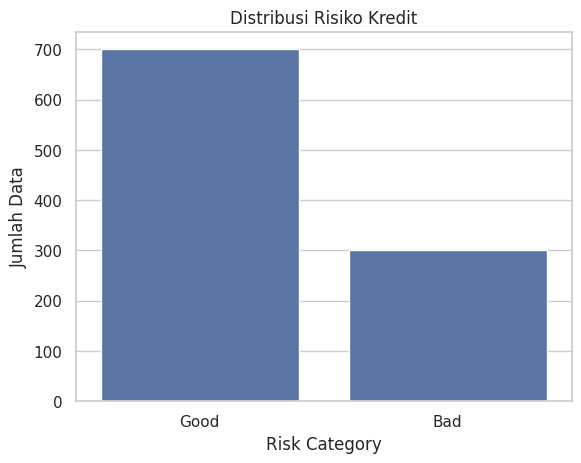

In [52]:
sns.countplot(x="Risk_Label", data=df)
plt.title("Distribusi Risiko Kredit")
plt.xlabel("Risk Category")
plt.ylabel("Jumlah Data")
plt.show()